<a href="https://colab.research.google.com/github/annisafitria/ImageRetrieval_219-231/blob/main/pixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download mohamedhanyyy/chest-ctscan-images

 91% 108M/119M [00:00<00:00, 124MB/s] 
100% 119M/119M [00:00<00:00, 128MB/s]


In [11]:
from zipfile import ZipFile
file_name = "chest-ctscan-images.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')

Berhasil


In [18]:
!wget https://riset.informatika.umm.ac.id/aguseko/lab.jpeg --no-check-certificate


--2021-11-03 13:04:28--  https://riset.informatika.umm.ac.id/aguseko/lab.jpeg
Resolving riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)... 202.52.52.30
Connecting to riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)|202.52.52.30|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 113870 (111K) [image/jpeg]
Saving to: ‘lab.jpeg’

lab.jpeg            100%[===================>] 111.20K   220KB/s    in 0.5s    

2021-11-03 13:04:30 (220 KB/s) - ‘lab.jpeg’ saved [113870/113870]



In [12]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

In [13]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [30]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/Data/test/adenocarcinoma/000108 (3).png"
}

In [26]:
img_src = cv2.imread('/content/Data/test/adenocarcinoma/000108 (3).png',0)
print(img_src)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


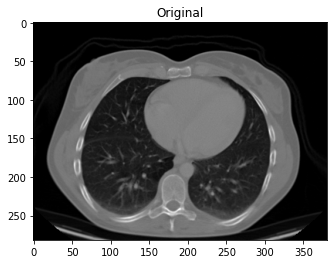

In [32]:
# load the image, grab its spatial dimensions (width and height),
# and then display the original image to our screen
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [33]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 1, Green: 1, Blue: 1
Pixel at (50, 20) - Red: 0, Green: 0, Blue: 0
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


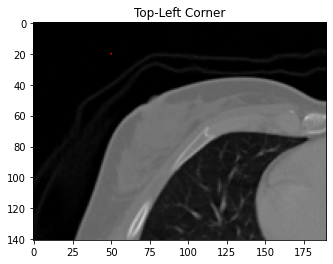

In [34]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

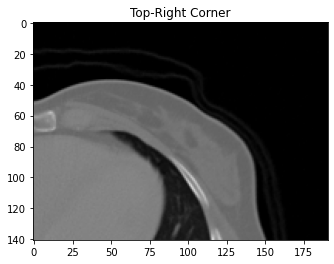

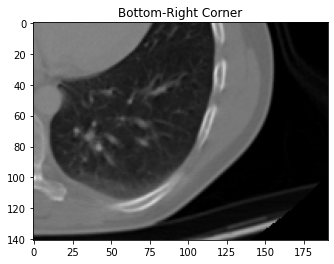

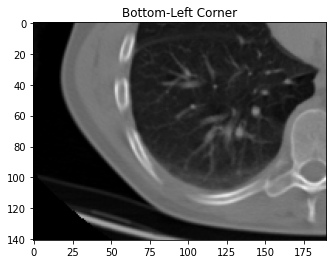

In [35]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

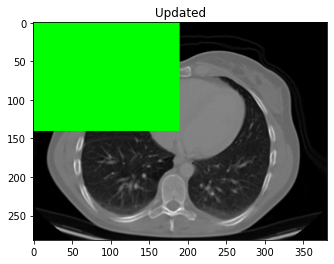

In [36]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)